DATA UNDERSTANDING 

In [956]:
import pandas as pd
import csv

In [957]:
url = "../data/100-songs-audience-report.csv"

In [958]:
with open(url, encoding='utf-8') as f:
    reader = csv.reader(f)
    lignes = list(reader)

In [959]:
header = lignes[0]
data = lignes[1:]
df = pd.DataFrame(data, columns=header)

In [960]:
df.head()

,1\tsong_id,title,artist,release_date,image_url,timeSeries,summaries
0,2\t3792d35a-7139-4a51-b479-c62b4fc0eeaf,Backtrack,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/9/3/1/3792...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 3949, ""metric"": ..."
1,3\t1655ec20-f054-4a27-936a-4adf93af347c,Foreshadow,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/4/5/0/1655...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1067, ""metric"": ..."
2,4\td8a3791a-1f2a-41a6-8000-8125004975fa,Lullaby for Freedom,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/a/2/f/d8a3...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1230, ""metric"": ..."
3,5\t9b773d19-3bc4-4c16-b831-5793d39b9e46,Afterglow,Pierre-François Blanchard,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/4/c/b/9b77...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1207, ""metric"": ..."
4,6\t6447b5a2-c495-4b6b-b867-2c38b842b9ed,Tempêtes,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/5/9/4/6447...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 2011, ""metric"": ..."


création d'une copy pour garder la version initiale 

In [961]:
df_copy = df.copy()

enlever les caractéres de tabulation ((i=1,i=length(df),i++) i\t ) de ma première colonne

In [962]:
df.iloc[:, 0] = df.iloc[:, 0].str.split('\t').str[1]

In [963]:
df.columns = [col.split('\t')[-1] for col in df.columns]

la dimension de mon dataset

In [964]:
df.shape

(12320, 7)

Consulter les métadonnées de mes colonnes

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12320 entries, 0 to 12319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_id       12320 non-null  object
 1   title         12320 non-null  object
 2   artist        12320 non-null  object
 3   release_date  12320 non-null  object
 4   image_url     12320 non-null  object
 5   timeSeries    12320 non-null  object
 6   summaries     12319 non-null  object
dtypes: object(7)
memory usage: 673.9+ KB


In [966]:
df.head()

,song_id,title,artist,release_date,image_url,timeSeries,summaries
0,3792d35a-7139-4a51-b479-c62b4fc0eeaf,Backtrack,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/9/3/1/3792...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 3949, ""metric"": ..."
1,1655ec20-f054-4a27-936a-4adf93af347c,Foreshadow,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/4/5/0/1655...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1067, ""metric"": ..."
2,d8a3791a-1f2a-41a6-8000-8125004975fa,Lullaby for Freedom,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/a/2/f/d8a3...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1230, ""metric"": ..."
3,9b773d19-3bc4-4c16-b831-5793d39b9e46,Afterglow,Pierre-François Blanchard,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/4/c/b/9b77...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1207, ""metric"": ..."
4,6447b5a2-c495-4b6b-b867-2c38b842b9ed,Tempêtes,Pierre-François Blanchard & Thomas Savy,2024-02-02T00:00:00+00:00,https://assets.soundcharts.com/song/5/9/4/6447...,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 2011, ""metric"": ..."


In [967]:
df.describe()

,song_id,title,artist,release_date,image_url,timeSeries,summaries
count,12320,12320,12320,12320,12320,12320,12319
unique,12291,11444,3378,1864,12291,9273,9206
top,be392f34-9b07-4e4e-94f5-d87c9adce103,Intro,Julien Girauld,,https://assets.soundcharts.com/song/7/0/b/be39...,[],{}
freq,2,10,100,575,2,2899,2899


DATA PREPARATION

enlever les lignes dupliquer 

In [968]:
df.duplicated().sum()

np.int64(15)

In [969]:
df = df.drop_duplicates(subset=['song_id'])


enlever la colonne image_url car j'ai pas besoin de cette colonne dans mon étude

In [970]:
df.drop(columns=['image_url'], inplace=True)

In [971]:

#pd.set_option('display.max_colwidth', None)

#print(df.loc[[10], df.columns[-1]])


enlever les valeurs null

In [972]:
df.isnull().sum()

song_id         0
title           0
artist          0
release_date    0
timeSeries      0
summaries       1
dtype: int64

In [973]:
df = df.dropna(subset=['summaries'])

transformer les colonnes en type qu'il faut 

In [974]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'] = df['release_date'].dt.date


df['artist'] = df['artist'].astype(str).str.strip()
df['artist'].dtype()


In [975]:
df['title'] = df['title'].astype(str).str.strip()
df['title'].dtype

dtype('O')

création d'un dataFrame contient tous les artistes et leurs chansons

In [976]:
import pandas as pd
import re


df_artists = df.copy()


df_artists['artist'] = df_artists['artist'].str.lower()  
df_artists['artist'] = df_artists['artist'].str.replace(r'\s*(feat\.|ft\.|vs|&| et )\s*', ',', regex=True)


df_artists['artist'] = df_artists['artist'].str.split(',')


df_artists = df_artists.explode('artist')
df_artists['artist'] = df_artists['artist'].str.strip()
df_artists['artist'] = df_artists['artist'].str.replace(r'[^\w\s\-\'\.]', '', regex=True)  


df_artists = df_artists[df_artists['artist'] != '']  
df_artists.head()


,song_id,title,artist,release_date,timeSeries,summaries
0,3792d35a-7139-4a51-b479-c62b4fc0eeaf,Backtrack,pierre-françois blanchard,2024-02-02,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 3949, ""metric"": ..."
0,3792d35a-7139-4a51-b479-c62b4fc0eeaf,Backtrack,thomas savy,2024-02-02,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 3949, ""metric"": ..."
1,1655ec20-f054-4a27-936a-4adf93af347c,Foreshadow,pierre-françois blanchard,2024-02-02,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1067, ""metric"": ..."
1,1655ec20-f054-4a27-936a-4adf93af347c,Foreshadow,thomas savy,2024-02-02,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1067, ""metric"": ..."
2,d8a3791a-1f2a-41a6-8000-8125004975fa,Lullaby for Freedom,pierre-françois blanchard,2024-02-02,"[{""date"": ""2024-04-29T00:00:00+00:00"", ""spotif...","{""spotify-streams"": {""value"": 1230, ""metric"": ..."


In [977]:
df_artists['artist'].apply(lambda x: isinstance(x, str)).all()


np.True_

regrouper les chansons de chaque artistes

In [978]:
artist_songs_grouped = (
    df_artists[['artist', 'title']]
    .groupby('artist')['title']
    .apply(list)
    .reset_index(name='songs')
)

In [979]:
artist_songs_grouped[artist_songs_grouped['artist'] == '100 gecs']

,artist,songs
4,100 gecs,[Play Date - 100 gecs Remix]


In [980]:
chansons_par_artiste = df_artists.groupby('artist')['title'].count().reset_index(name='nombre_chansons')
chansons_par_artiste.head(20)

,artist,nombre_chansons
0,gojii,2
1,o,1
2,-m-,97
3,00skoot,1
4,100 gecs,1
5,100 la rime,26
6,100th monkey,1
7,155 kyu,1
8,1863,1
9,1ndekxx,7


afficher les 20 artistes les plus présents dans ton dataset

C:\Users\tr\AppData\Local\Temp\ipykernel_28288\2459292539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artistes, y='artist', x='nombre_chansons', palette='viridis')


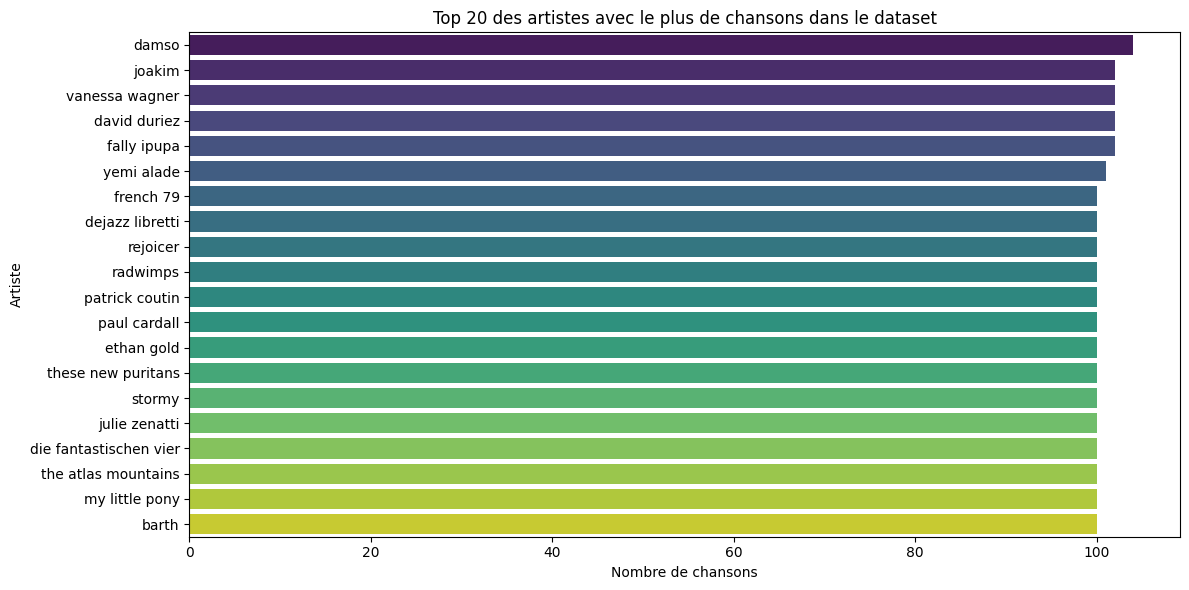

In [981]:
import matplotlib.pyplot as plt
import seaborn as sns


top_artistes = chansons_par_artiste.sort_values(by='nombre_chansons', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artistes, y='artist', x='nombre_chansons', palette='viridis')
plt.title('Top 20 des artistes avec le plus de chansons dans le dataset')
plt.xlabel('Nombre de chansons')
plt.ylabel('Artiste')
plt.tight_layout()
plt.show()

artistes ayant des titres de chansons similaires

In [982]:
df_artists['title_clean'] = df_artists['title'].str.lower().str.strip()
df_artists['title_clean'] = df_artists['title_clean'].str.replace(r'[^\w\s\-\'\.]', '', regex=True)

artistes_par_titre = df_artists.groupby('title_clean')['artist'] \
                               .unique() \
                               .reset_index(name='artistes')

artistes_par_titre['nb_artistes'] = artistes_par_titre['artistes'].apply(len)
artistes_par_titre = artistes_par_titre.sort_values(by='nb_artistes', ascending=False)

artistes_par_titre[['title_clean', 'artistes']].head(20)


,title_clean,artistes
1349,bum bum german rmx - german rmx,"[corbo, mac kregor, al peco, poison, ziefta, k..."
10538,vip bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."
7502,passionnel bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."
10214,tu pouvais pas le soupçonner bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."
2153,de la peine a limiter bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."
148,5 etoiles bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."
3359,freeride bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."
7154,on s'aime pas bonus track,"[rastamat, alibi montana, bona rock, miasto, d..."
7425,paradoxes bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."
3043,faut qu'ca glisse bonus track,"[corbo, mac kregor, al peco, poison, ziefta, k..."


Top chansons avec le plus d’artistes (collaborations)

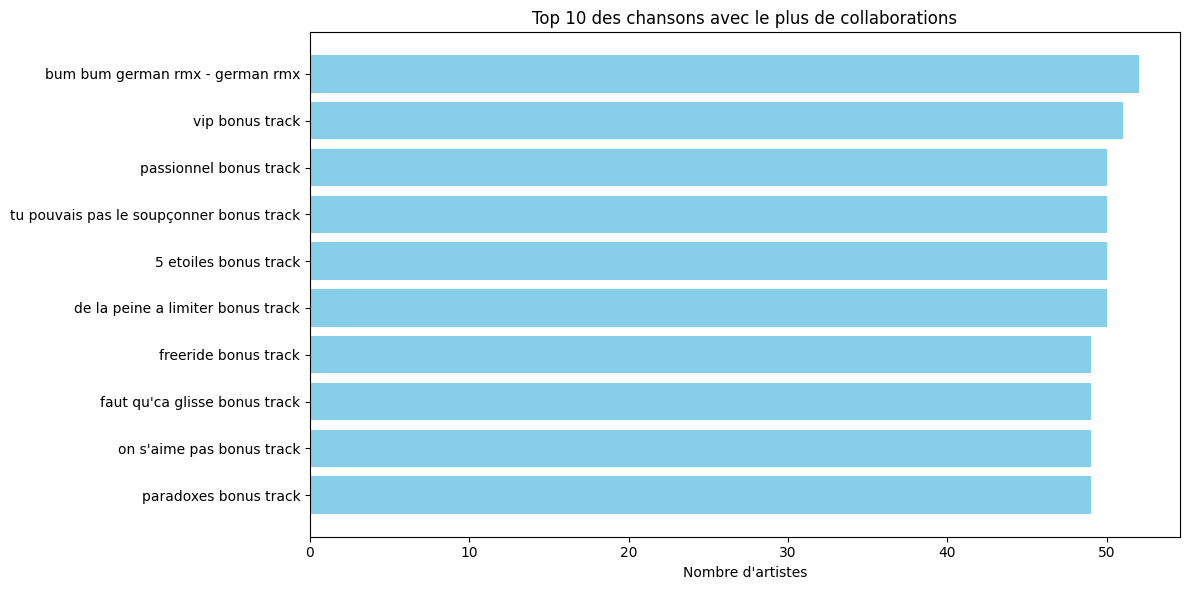

In [983]:
import matplotlib.pyplot as plt


top_collab = artistes_par_titre.sort_values(by='nb_artistes', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_collab['title_clean'], top_collab['nb_artistes'], color='skyblue')
plt.xlabel("Nombre d'artistes")
plt.title("Top 10 des chansons avec le plus de collaborations")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


Chansons ayant la même date de sortie de la plus ancienne à la plus récente

C:\Users\tr\AppData\Local\Temp\ipykernel_28288\2665329575.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dates, x='release_date', y='nombre_chansons', palette='coolwarm')


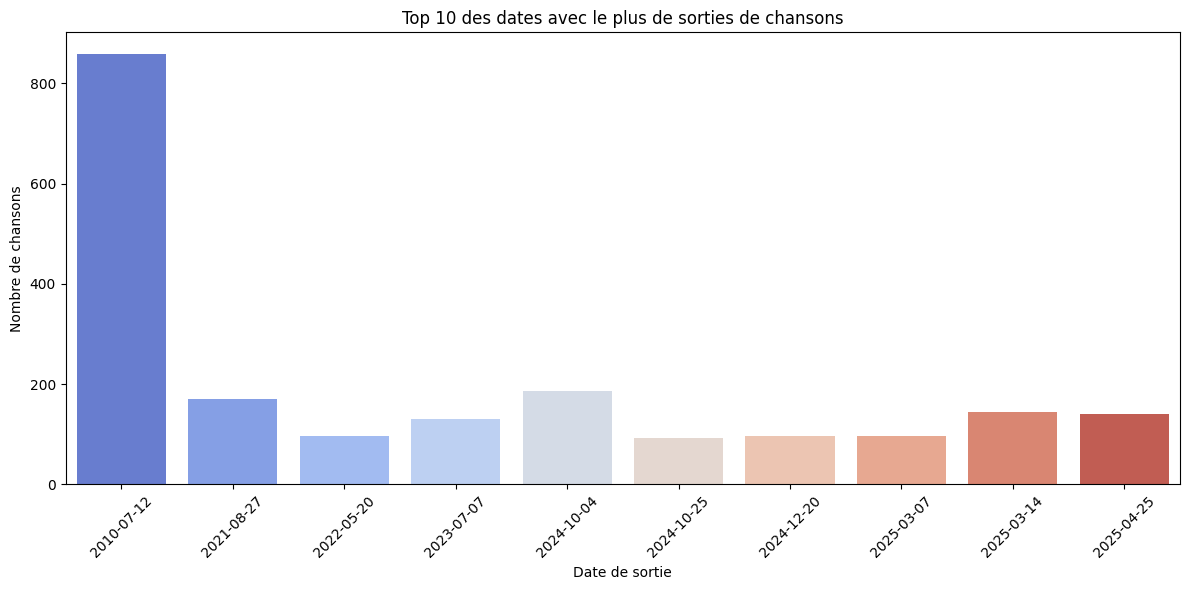

In [984]:
chansons_par_date = df_artists.groupby('release_date')['title'].count().reset_index(name='nombre_chansons')

dates_avec_plusieurs_chansons = chansons_par_date[chansons_par_date['nombre_chansons'] > 1]


top_dates = dates_avec_plusieurs_chansons.sort_values(by='nombre_chansons', ascending=False).head(10)

top_dates = top_dates.sort_values(by='release_date', ascending=True)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=top_dates, x='release_date', y='nombre_chansons', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 des dates avec le plus de sorties de chansons')
plt.xlabel('Date de sortie')
plt.ylabel('Nombre de chansons')
plt.tight_layout()
plt.show()


Maintenant occupant nous des colonnes json pour extraire les informations necessaire 

In [985]:
import json

PARSER LES COLONNES JSON pour extraire les données utiles 

In [986]:
import pandas as pd
import json

def extract_analysis_summaries(df):
    rows = []
    for idx, row in df.iterrows():
        summary_json = row.get('summaries')
        
        # Cas vide ou nul
        if pd.isna(summary_json) or not summary_json:
            rows.append({
                'streams_value': None,
                'streams_evolution_1w': None,
                'streams_evolution_28d': None,
                'streams_evolution_1y': None,
                'streams_percentEvolution_1w': None,
                'streams_percentEvolution_28d': None,
                'streams_percentEvolution_1y': None,
                'popularity_value': None,
                'popularity_evolution_1w': None,
                'popularity_percentEvolution_1w': None,
                'popularity_evolution_28d': None,
                'popularity_percentEvolution_28d': None,
                'firstDataPointDate': None,
                'lastDataPointDate': None
            })
            continue

        try:
            summary = json.loads(summary_json)
        except json.JSONDecodeError:
            rows.append({
                'streams_value': None,
                'streams_evolution_1w': None,
                'streams_evolution_28d': None,
                'streams_evolution_1y': None,
                'streams_percentEvolution_1w': None,
                'streams_percentEvolution_28d': None,
                'streams_percentEvolution_1y': None,
                'popularity_value': None,
                'popularity_evolution_1w': None,
                'popularity_percentEvolution_1w': None,
                'popularity_evolution_28d': None,
                'popularity_percentEvolution_28d': None,
                'firstDataPointDate': None,
                'lastDataPointDate': None
            })
            continue

        spotify_streams = summary.get('spotify-streams', {})
        spotify_popularity = summary.get('spotify-popularity', {})

        periods_streams = spotify_streams.get('periods', {})
        periods_popularity = spotify_popularity.get('periods', {})

        rows.append({
            'streams_value': spotify_streams.get('value'),
            'streams_evolution_1w': periods_streams.get('1w', {}).get('evolution'),
            'streams_evolution_28d': periods_streams.get('28d', {}).get('evolution'),
            'streams_evolution_1y': periods_streams.get('1y', {}).get('evolution'),
            'streams_percentEvolution_1w': periods_streams.get('1w', {}).get('percentEvolution'),
            'streams_percentEvolution_28d': periods_streams.get('28d', {}).get('percentEvolution'),
            'streams_percentEvolution_1y': periods_streams.get('1y', {}).get('percentEvolution'),

            'popularity_value': spotify_popularity.get('value'),
            'popularity_evolution_1w': periods_popularity.get('1w', {}).get('evolution'),
            'popularity_percentEvolution_1w': periods_popularity.get('1w', {}).get('percentEvolution'),
            'popularity_evolution_28d': periods_popularity.get('28d', {}).get('evolution'),
            'popularity_percentEvolution_28d': periods_popularity.get('28d', {}).get('percentEvolution'),

            'firstDataPointDate': spotify_streams.get('firstDataPointDate') or spotify_popularity.get('firstDataPointDate'),
            'lastDataPointDate': spotify_streams.get('lastDataPointDate') or spotify_popularity.get('lastDataPointDate')
        })

    extracted = pd.DataFrame(rows)
    return pd.concat([
        df[['song_id', 'title', 'artist', 'release_date', 'timeSeries']].reset_index(drop=True),
        extracted
    ], axis=1)


In [987]:
df_summarie_pars = extract_analysis_summaries(df)
print(df_summarie_pars.head())

                                song_id                title  \
0  3792d35a-7139-4a51-b479-c62b4fc0eeaf            Backtrack   
1  1655ec20-f054-4a27-936a-4adf93af347c           Foreshadow   
2  d8a3791a-1f2a-41a6-8000-8125004975fa  Lullaby for Freedom   
3  9b773d19-3bc4-4c16-b831-5793d39b9e46            Afterglow   
4  6447b5a2-c495-4b6b-b867-2c38b842b9ed             Tempêtes   

                                    artist release_date  \
0  Pierre-François Blanchard & Thomas Savy   2024-02-02   
1  Pierre-François Blanchard & Thomas Savy   2024-02-02   
2  Pierre-François Blanchard & Thomas Savy   2024-02-02   
3                Pierre-François Blanchard   2024-02-02   
4  Pierre-François Blanchard & Thomas Savy   2024-02-02   

                                          timeSeries  streams_value  \
0  [{"date": "2024-04-29T00:00:00+00:00", "spotif...         3949.0   
1  [{"date": "2024-04-29T00:00:00+00:00", "spotif...         1067.0   
2  [{"date": "2024-04-29T00:00:00+00:00", "spot

In [988]:
df_summarie_pars.columns

Index(['song_id', 'title', 'artist', 'release_date', 'timeSeries',
       'streams_value', 'streams_evolution_1w', 'streams_evolution_28d',
       'streams_evolution_1y', 'streams_percentEvolution_1w',
       'streams_percentEvolution_28d', 'streams_percentEvolution_1y',
       'popularity_value', 'popularity_evolution_1w',
       'popularity_percentEvolution_1w', 'popularity_evolution_28d',
       'popularity_percentEvolution_28d', 'firstDataPointDate',
       'lastDataPointDate'],
      dtype='object')

In [989]:
df_summarie_pars['firstDataPointDate'] = pd.to_datetime(df_summarie_pars['firstDataPointDate'], errors='coerce')
df_summarie_pars['firstDataPointDate'] = df_summarie_pars['firstDataPointDate'].dt.date

df_summarie_pars['lastDataPointDate'] = pd.to_datetime(df_summarie_pars['lastDataPointDate'], errors='coerce')
df_summarie_pars['lastDataPointDate'] = df_summarie_pars['lastDataPointDate'].dt.date



Voir les chansons avec le plus de streams

In [990]:
result = extract_analysis_summaries(df)
top_streams = result.sort_values(by='streams_value', ascending=False).head(10)
print(top_streams[['title', 'streams_value']])

                               title  streams_value
6854                      La Bachata   2.145891e+09
7719                 I Ain't Worried   1.990577e+09
7720                 I Ain't Worried   1.987307e+09
5327                   Es un Secreto   1.307462e+09
10798                      un x100to   1.302510e+09
10767                    PERRO NEGRO   1.070712e+09
11874  Fortnight (feat. Post Malone)   9.195524e+08
10766                 WHERE SHE GOES   8.486364e+08
10797                 WHERE SHE GOES   8.486364e+08
10805                       La Jumpa   8.097668e+08


Évolution de la popularité 

In [991]:
result[['popularity_value', 'popularity_evolution_1w', 'popularity_evolution_28d']].describe()

,popularity_value,popularity_evolution_1w,popularity_evolution_28d
count,8660.000000,8527.000000,8265.000000
mean,17.610508,-0.234197,-0.459649
std,18.249725,5.236818,4.864634
min,1.000000,-67.000000,-67.000000
25%,2.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000
75%,28.000000,0.000000,1.000000
max,98.000000,60.000000,67.000000


Visualiser l’évolution

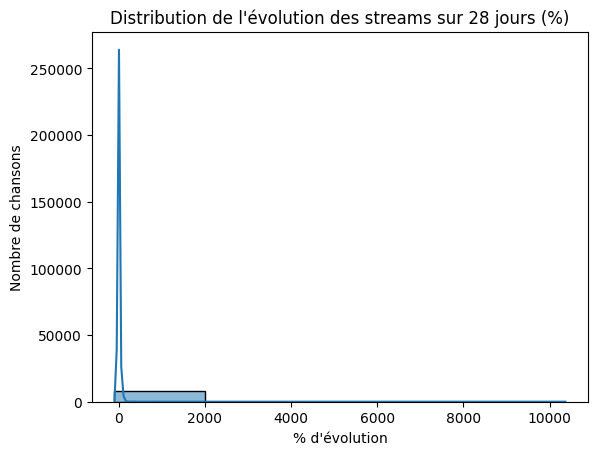

In [992]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(result['streams_percentEvolution_28d'].dropna(), bins=5, kde=True)
plt.title("Distribution de l'évolution des streams sur 28 jours (%)")
plt.xlabel("% d'évolution")
plt.ylabel("Nombre de chansons")
plt.show()


Analyse de la corrélation entre popularity_value et les autres variables 

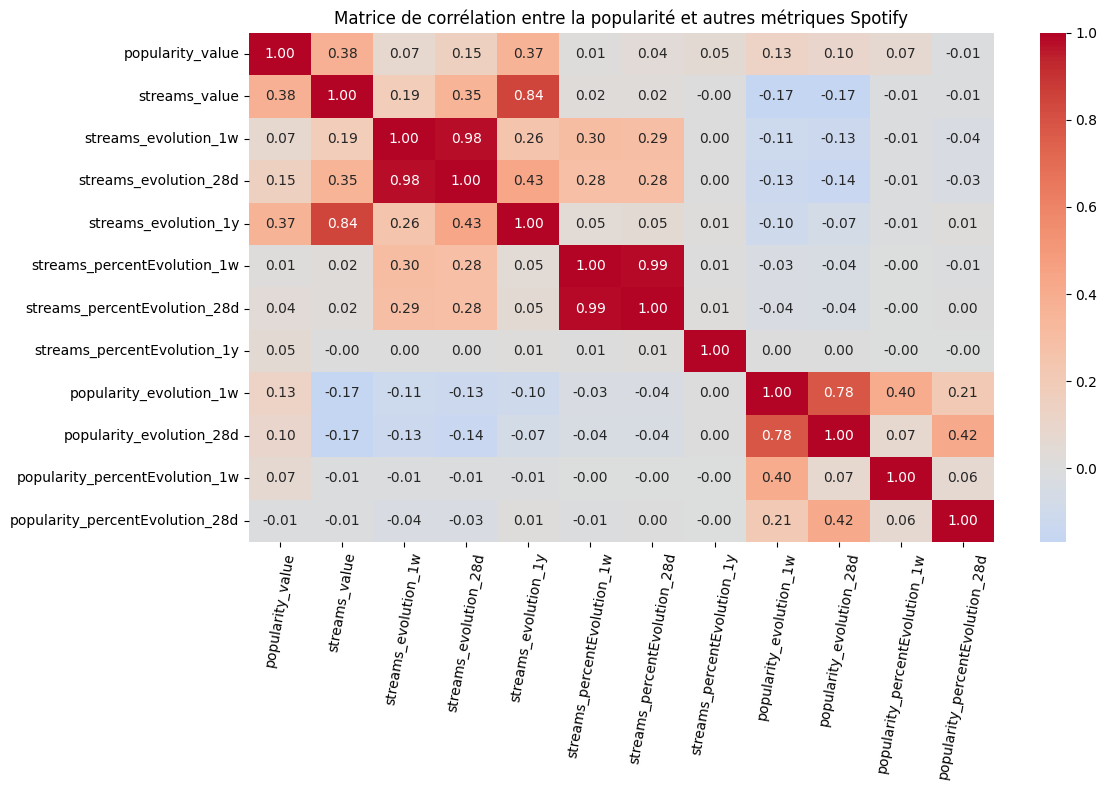

In [993]:
correlation_columns = [
    'popularity_value',
    'streams_value',
    'streams_evolution_1w',
    'streams_evolution_28d',
    'streams_evolution_1y',
    'streams_percentEvolution_1w',
    'streams_percentEvolution_28d',
    'streams_percentEvolution_1y',
    'popularity_evolution_1w',
    'popularity_evolution_28d',
    'popularity_percentEvolution_1w',
    'popularity_percentEvolution_28d'
]

df_corr = result[correlation_columns].copy()
df_corr = df_corr.dropna()  
correlation_matrix = df_corr.corr(method='pearson')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Matrice de corrélation entre la popularité et autres métriques Spotify')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


Analyse des artistes les plus populaires

C:\Users\tr\AppData\Local\Temp\ipykernel_28288\204803487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, y='artist', x='popularity_value', palette='viridis')


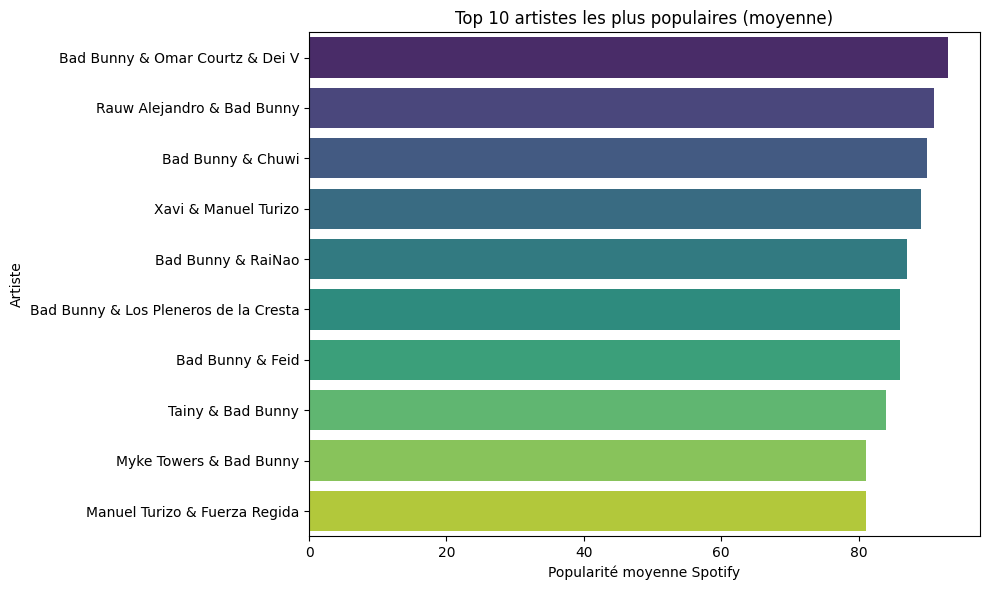

In [994]:
top_artists = result.groupby('artist')['popularity_value'].mean().reset_index()
top_artists = top_artists.sort_values(by='popularity_value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists, y='artist', x='popularity_value', palette='viridis')
plt.title("Top 10 artistes les plus populaires (moyenne)")
plt.xlabel("Popularité moyenne Spotify")
plt.ylabel("Artiste")
plt.tight_layout()
plt.show()


Évolution dans le temps : popularité ou streams

In [995]:
result['firstDataPointDate'] = pd.to_datetime(result['firstDataPointDate'], errors='coerce')
result['lastDataPointDate'] = pd.to_datetime(result['lastDataPointDate'], errors='coerce')


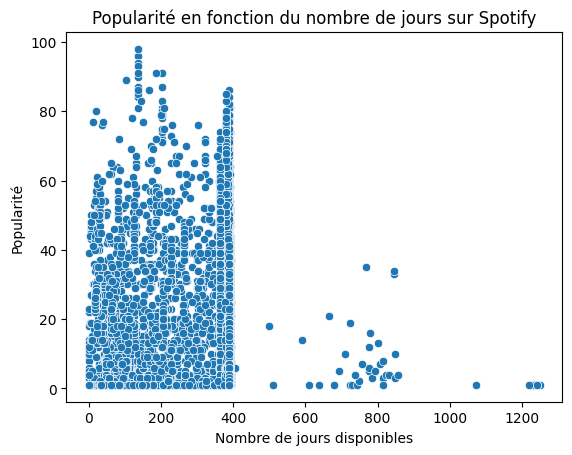

In [996]:

result['release_date'] = pd.to_datetime(result['release_date'])

result['disponibilite_jours'] = (result['lastDataPointDate'] - result['firstDataPointDate']).dt.days

sns.scatterplot(data=result, x='disponibilite_jours', y='popularity_value')
plt.title("Popularité en fonction du nombre de jours sur Spotify")
plt.xlabel("Nombre de jours disponibles")
plt.ylabel("Popularité")
plt.show()

Identifier les chansons virales

In [997]:
virales = result.sort_values(by='streams_percentEvolution_1w', ascending=False).head(10)
virales[['title', 'artist', 'streams_percentEvolution_1w']]

,title,artist,streams_percentEvolution_1w
5026,MASTERCLASS,Heuss L'enfoiré & Fally Ipupa,251.472780
7858,Comme Toi,Gabriela Richardson & Lewis OfMan,229.381966
6805,QUE HACES,Becky G & Manuel Turizo,168.051906
11169,A Season In Hell,These New Puritans,149.930546
6355,KYKY2BONDY,Hamza,132.684624
49,me acuerdo de ti,GAZZI,109.496910
3786,AYOU,JRK 19,107.425156
3787,BONNE SOIRÉE,JRK 19 & Guy2Bezbar,106.758218
56,Tus Ojos,GAZZI & NIDIA,106.671947
10550,See You Again,The Feather,106.532663


extraire les données à partir de timeSeries

In [998]:
import pandas as pd
import json

def extract_time_series(df, col_time_series):
    all_rows = []

    for idx, json_str in df[col_time_series].items():
        if pd.isna(json_str) or json_str == '':
            continue
        try:
            data_list = json.loads(json_str)
            if isinstance(data_list, list):
                for entry in data_list:
                    all_rows.append({
                        "id_ligne": idx,
                        "date": entry.get("date"),
                        "artist" : entry.get("artist"),
                        "title": entry.get("title"),
                        "spotify_streams": entry.get("spotify-streams"),
                        "spotify_popularity": entry.get("spotify-popularity", None)
                    })
            else:
                print(f"Contenu inattendu à la ligne {idx} : {type(data_list)}")
        except Exception as e:
            print(f"Erreur au parsing JSON à la ligne {idx}: {e}")
            continue

    result_df = pd.DataFrame(all_rows)
    return result_df


In [999]:
df_time_series = extract_time_series(df, 'timeSeries')

Évolution des streams dans le temps (globale)

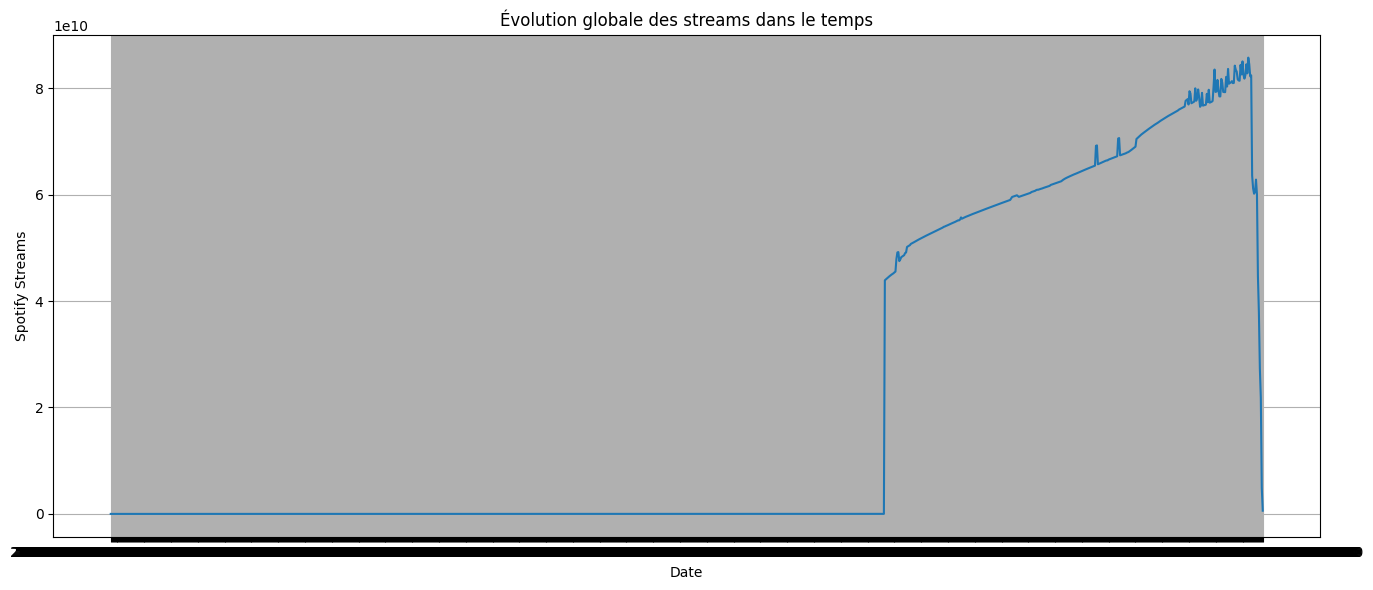

In [1000]:
import matplotlib.pyplot as plt
import seaborn as sns

streams_over_time = df_time_series.groupby('date')['spotify_streams'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=streams_over_time, x='date', y='spotify_streams')
plt.title("Évolution globale des streams dans le temps")
plt.xlabel("Date")
plt.ylabel("Spotify Streams")
plt.grid(True)
plt.tight_layout()
plt.show()


Moyenne mobile pour détecter tendances

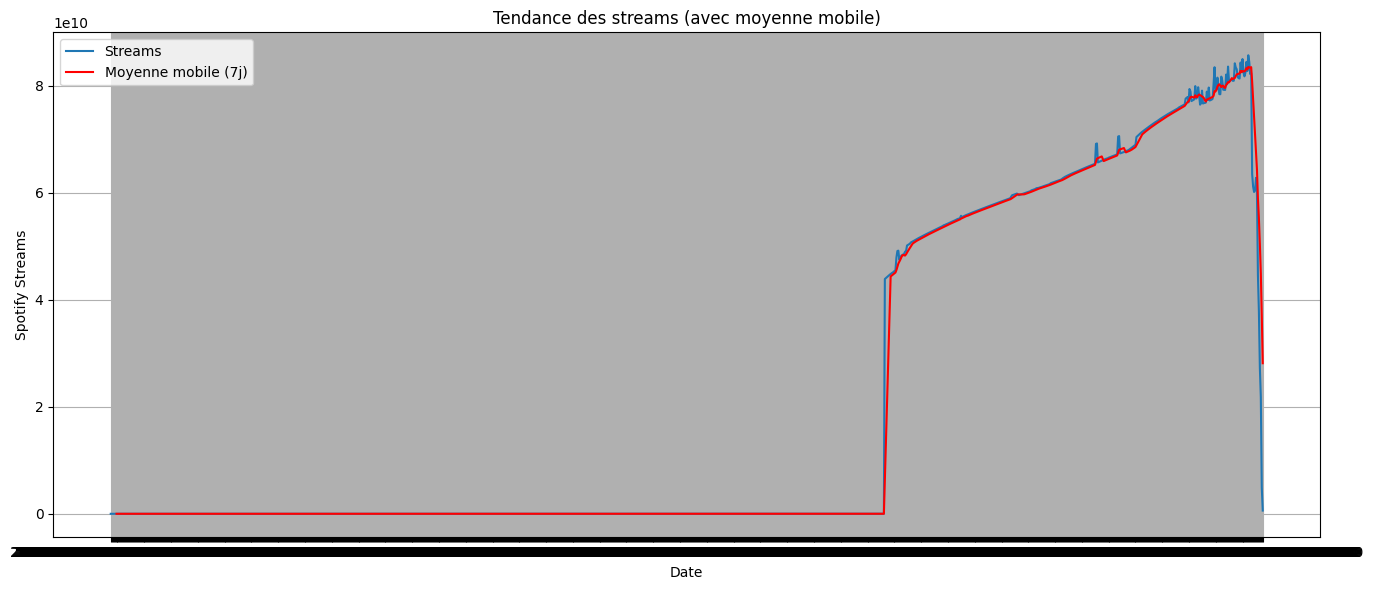

In [1002]:
streams_over_time['rolling_mean'] = streams_over_time['spotify_streams'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
sns.lineplot(data=streams_over_time, x='date', y='spotify_streams', label='Streams')
sns.lineplot(data=streams_over_time, x='date', y='rolling_mean', label='Moyenne mobile (7j)', color='red')
plt.title("Tendance des streams (avec moyenne mobile)")
plt.xlabel("Date")
plt.ylabel("Spotify Streams")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Détection des pics

In [1003]:
top_days = streams_over_time.sort_values(by='spotify_streams', ascending=False).head(10)
print(top_days)


                           date  spotify_streams  rolling_mean
1180  2025-05-11T00:00:00+00:00     8.572384e+10  8.352984e+10
1174  2025-05-05T00:00:00+00:00     8.501419e+10  8.278907e+10
1181  2025-05-12T00:00:00+00:00     8.448010e+10  8.345354e+10
1178  2025-05-09T00:00:00+00:00     8.446831e+10  8.330679e+10
1172  2025-05-03T00:00:00+00:00     8.436437e+10  8.280052e+10
1166  2025-04-27T00:00:00+00:00     8.421986e+10  8.147112e+10
1159  2025-04-20T00:00:00+00:00     8.360518e+10  8.068636e+10
1145  2025-04-06T00:00:00+00:00     8.348777e+10  7.901978e+10
1167  2025-04-28T00:00:00+00:00     8.344376e+10  8.184529e+10
1168  2025-04-29T00:00:00+00:00     8.310800e+10  8.214841e+10
